In [14]:
import pandas as pd
import scattertext as st

#Gensim
import gensim
import gensim.corpora as corpora
import gensim.utils 

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models


In [15]:
stop_words = stopwords.words('english')
stop_words.extend(['so'])

def get_sentences_from_file():
    df = st.SampleCorpora.ConventionData2012.get_data().assign(
        parse = lambda df:df.text.apply(st.whitespace_nlp_with_sentences)
    )
    ls = df['text'].values.tolist()
    return ls

data = get_sentences_from_file()

print(type(data[0]))

<class 'str'>


In [16]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','ADV']):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    text_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags and token.text not in stop_words:
                new_text.append(token.lemma_)
        final = ' '.join(new_text)
        text_out.append(final)
        #print(text_out)
    return text_out

lemmatized_texts = lemmatization(data) #lista di stringhe
print(lemmatized_texts[2])

singular honor tonight year ago state senator year now many cold cold afternoon hand economic collapse last year hard too many family still today economy job business back friend friend party message last week alone real winner real builder never hand democrat well well history president strong together proud worker family chance affordable health care time governor good idea million american family great idea president opportunity justice proud first bill president discrimination woman workplace honor touching ceremony president together finally discrimination military year ago year ago little bill year ago year ago president justice day now critic way far firm enough backwards well strong fair backwards forward together value vision commitment justice still worth


In [17]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text)
        final.append(new)
    return(final)

data_words = gen_words(lemmatized_texts)

print(data_words[2])

        

['singular', 'honor', 'tonight', 'year', 'ago', 'state', 'senator', 'year', 'now', 'many', 'cold', 'cold', 'afternoon', 'hand', 'economic', 'collapse', 'last', 'year', 'hard', 'too', 'many', 'family', 'still', 'today', 'economy', 'job', 'business', 'back', 'friend', 'friend', 'party', 'message', 'last', 'week', 'alone', 'real', 'winner', 'real', 'builder', 'never', 'hand', 'democrat', 'well', 'well', 'history', 'president', 'strong', 'together', 'proud', 'worker', 'family', 'chance', 'affordable', 'health', 'care', 'time', 'governor', 'good', 'idea', 'million', 'american', 'family', 'great', 'idea', 'president', 'opportunity', 'justice', 'proud', 'first', 'bill', 'president', 'discrimination', 'woman', 'workplace', 'honor', 'touching', 'ceremony', 'president', 'together', 'finally', 'discrimination', 'military', 'year', 'ago', 'year', 'ago', 'little', 'bill', 'year', 'ago', 'year', 'ago', 'president', 'justice', 'day', 'now', 'critic', 'way', 'far', 'firm', 'enough', 'backwards', 'well

In [18]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text) #sacchetto di parole che conterrà un elenco di parole uniche e la loro frequenza nel corpus
    corpus.append(new)

print(corpus[2:3])

word = id2word[[0][:1][0]]
print(word)

[[(6, 5), (12, 1), (26, 1), (50, 1), (59, 1), (65, 1), (88, 2), (92, 1), (106, 1), (110, 1), (139, 1), (140, 1), (150, 1), (164, 1), (166, 3), (167, 1), (173, 1), (183, 1), (187, 2), (200, 1), (206, 1), (213, 1), (217, 1), (220, 1), (231, 2), (245, 1), (253, 2), (263, 1), (273, 2), (279, 1), (281, 1), (283, 1), (300, 1), (306, 2), (318, 1), (325, 1), (345, 5), (355, 2), (361, 2), (415, 1), (417, 2), (421, 2), (444, 1), (445, 3), (446, 1), (460, 1), (462, 1), (468, 1), (472, 3), (479, 1), (482, 1), (485, 7), (490, 1), (491, 1), (492, 1), (493, 2), (494, 2), (495, 1), (496, 1), (497, 1), (498, 1), (499, 2), (500, 1), (501, 1), (502, 1), (503, 2), (504, 2), (505, 3), (506, 1), (507, 1), (508, 1), (509, 1), (510, 1), (511, 1), (512, 1), (513, 1), (514, 1)]]
able


In [19]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, chunksize=100,
                                            passes=20, alpha='auto', per_word_topics=True)

# chunksize = Numero di documenti da utilizzare in ogni blocco di addestramento. 
# id2word ({dict of (int, str)= Mappatura dagli ID delle parole alle parole. È usato per determinare la dimensione del vocabolario, 
# oltre che per debugging e stampa di argomenti.
# pass = Numero di passaggi attraverso il corpus durante l'allenamento.
# per_word_topics ( bool )= Se True, il modello calcola anche un elenco di argomenti, 
#               ordinati in ordine decrescente di argomenti più probabili per ogni parola, 
#               insieme ai loro valori phi moltiplicati per la lunghezza della caratteristica (cioè il conteggio delle parole). 
# alpha ( {float , numpy.ndarray di float , elenco di float , str} , opzionale ) :
#   Convinzione a priori sulla distribuzione dell'argomento del documento, questo può essere:
#        scalare per una distribuzione simmetrica a priori rispetto all'argomento del documento,
#        Matrice 1D di lunghezza uguale a num_topics per denotare un utente asimmetrico definito prima per ogni argomento.



# classe gensim.models.ldamodel.LdaModel( corpus=Nessuno , num_topics=100 , id2word=Nessuno , distribuito=False , 
#                                         chunksize=2000 , pass=1 , update_every=1 , alpha='simmetrico' , eta=Nessuno , 
#                                         decadimento=0.5 , offset=1.0 , eval_every=10 , iterazioni=50 , 
#                                         gamma_threshold=0.001 , Minimum_probability =0.01 , random_state=Nessuno , 
#                                         ns_conf=Nessuno , minimo_phi_value =0.01 , per_word_topics=False , callbacks=Nessuno , 
#                                         dtype=<class 'numpy.float32'> )

In [20]:
#print(lda_model.get_document_topics(data[2]))


In [21]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

/home/sara/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [22]:
#Visualization
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
df = st.SampleCorpora.ConventionData2012.get_data().assign(
        parse = lambda df:df.text.apply(st.whitespace_nlp_with_sentences)
    )



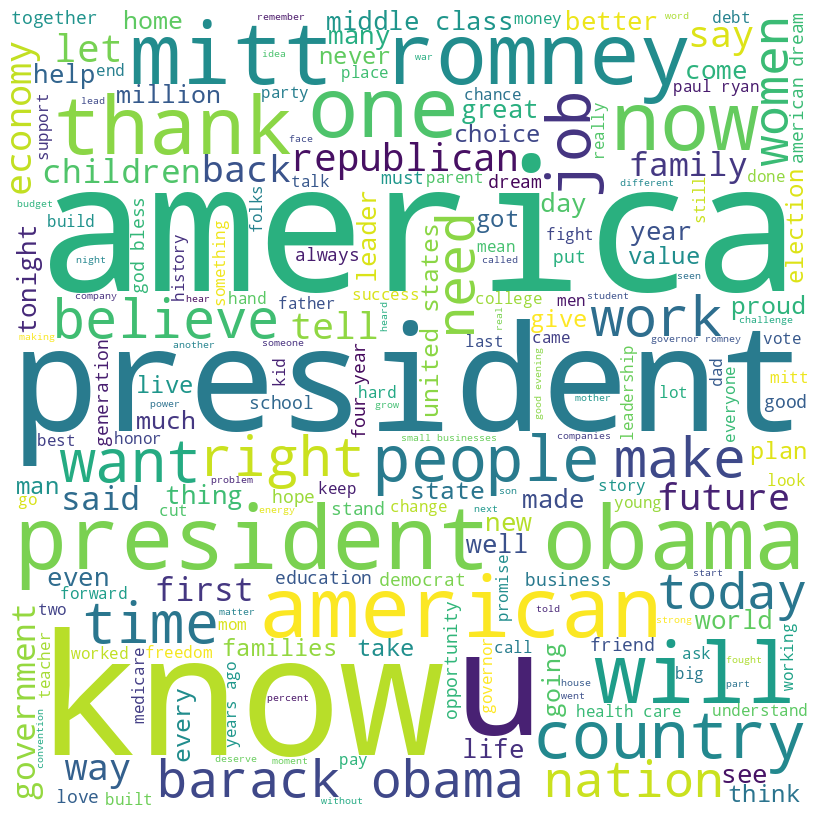

In [24]:
# iterate through the csv file
def wordcloud():
	comment_words = ''
	stopwords = set(STOPWORDS)
	for val in df['text']:
	# typecaste each val to string
		val = str(val)
	# split the value
		tokens = val.split()
	# Converts each token into lowercase
		for i in range(len(tokens)):
			tokens[i] = tokens[i].lower()
		comment_words += " ".join(tokens)+" "

	wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)
	# plot the WordCloud image					
	plt.figure(figsize = (8, 8), facecolor = None)
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.tight_layout(pad = 0)

	plt.show()

wordcloud()